In [2]:
import nmresearch as nmr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import time
import pickle

In [3]:
# decent color schemes for plots and such

colors = [
    "#1984c5",
    "#22a7f0",
    "#63bff0",
    "#a7d5ed",
    "#e2e2e2",
    "#e1a692",
    "#de6e56",
    "#e14b31",
    "#c23728",
]

colors_single = [
    "#fff5eb",
    "#fee6ce",
    "#fdd0a2",
    "#fdae6b",
    "#fd8d3c",
    "#f16913",
    "#d94801",
    "#a63603",
    "#7f2704",
]
colors_single.reverse()
zcorr_str = r"$\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle$"
xcorr_str = r"$\langle$ $\hat{S}_x (nT)$ $\hat{S}_x$ $\rangle$"
mucorr_str = r"$\langle$ $\hat{S}_\mu (nT)$ $\hat{S}_\mu$ $\rangle$"
zcorr_loc_str = r"$\langle$ $\hat{S}_z^{(0)} (nT)$ $\hat{S}_z^{(0)}$ $\rangle$"

In [4]:
plt.rcParams.update({"font.size": 14})
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

In [5]:
def get_perc_data(filename):
    filename = "data/" + filename
    try:
        return pickle.load(open(filename, "rb"))
    except FileNotFoundError:
        return None

In [ ]:
r_list = [8, 10, 12, 14, 16]
sig_vals = np.arange(0.1, 10, 0.1)
reps = 100
density = {}
strength = {}

nn_cluster = get_perc_data("nn_cluster.dat")
nn_strength = get_perc_data("nn_strength.dat")
if nn_cluster is None or nn_strength is None:
    nn_cluster = {}
    nn_strength = {}
    fcc = nmr.FccGraph()
    q_calc = nmr.QuantumGraph(fcc)
    for r in r_list:
        start = time.time()
        nn_cluster[r] = [
            q_calc.avg_cluster_size(sigma=sigma, dim=r, layers=1, repititions=reps)
            for sigma in sig_vals
        ]
        nn_strength[r] = [
            q_calc.percolation_strength(sigma=sigma, dim=r, layers=1, repititions=reps)
            for sigma in sig_vals
        ]
        end = time.time()
        print(
            f"Avg Computation time per fcc graph for r={r} is {(end-start)/(reps*len(sig_vals))} s"
        )

    with open("data/nn_cluster.dat", "wb") as f:
        pickle.dump(nn_cluster, f)

    with open("data/nn_strength.dat", "wb") as f:
        pickle.dump(nn_strength, f)

8
Avg Computation time per fcc graph for r=8 is 0.029169700434713654 s
10
Avg Computation time per fcc graph for r=10 is 0.0710959673650337 s
12
Avg Computation time per fcc graph for r=12 is 0.16072112550639142 s
14
Avg Computation time per fcc graph for r=14 is 0.3265530282319194 s
16
Avg Computation time per fcc graph for r=16 is 0.6036322563585609 s


In [6]:
r_list = [8, 10, 12, 14, 16]
sig_vals = np.arange(0.1, 10, 0.1)
reps = 100
density = {}
strength = {}

n7_cluster = get_perc_data("n7_cluster.dat")
n7_strength = get_perc_data("n7_strength.dat")
if n7_cluster is None or n7_strength is None:
    n7_cluster = {}
    n7_strength = {}
    fcc = nmr.FccGraph()
    q_calc = nmr.QuantumGraph(fcc)
    for r in r_list:
        start = time.time()
        n7_cluster[r] = [
            q_calc.avg_cluster_size(sigma=sigma, dim=r, layers=6, repititions=reps)
            for sigma in sig_vals
        ]
        n7_strength[r] = [
            q_calc.percolation_strength(sigma=sigma, dim=r, layers=6, repititions=reps)
            for sigma in sig_vals
        ]
        end = time.time()
        print(
            f"Avg Computation time per fcc graph for r={r} is {(end-start)/(reps*len(sig_vals))} s"
        )

    with open("data/n7_cluster.dat", "wb") as f:
        pickle.dump(density, f)

    with open("data/n7_strength.dat", "wb") as f:
        pickle.dump(strength, f)

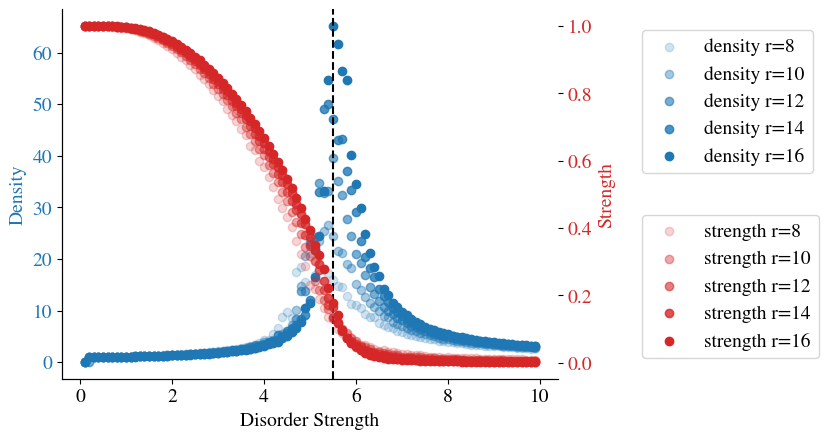

In [8]:
fig, ax1 = plt.subplots()
max_density_sigma = 0
max_density = 0
color = "tab:blue"
ax1.set_xlabel("Disorder Strength")
ax1.set_ylabel("Density", color=color)
for idx, r in enumerate(r_list):
    ax1.scatter(
        sig_vals,
        n7_cluster[r],
        label=f"density r={r}",
        color=color,
        alpha=(idx + 1) / len(r_list),
    )
    ax1.tick_params(axis="y", labelcolor=color)
    if max_density < np.max(n7_cluster[r]):
        max_density_sigma = sig_vals[np.argmax(n7_cluster[r])]
        max_density = np.max(n7_cluster[r])

ax1.axvline(x=max_density_sigma, color="black", linestyle="--")
plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.75))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:red"
ax2.set_ylabel("Strength", color=color)  # we already handled the x-label with ax1
for idx, r in enumerate(r_list):
    ax2.scatter(
        sig_vals,
        n7_strength[r],
        label=f"strength r={r}",
        color=color,
        alpha=(idx + 1) / len(r_list),
    )
    ax2.tick_params(axis="y", labelcolor=color)

plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.25))
plt.show()